# Logistic Regression

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

### Read CSV file 

In [3]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Check null values

In [8]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Plot the species value count graph

<Axes: title={'center': 'Count Plot for species'}, xlabel='species'>

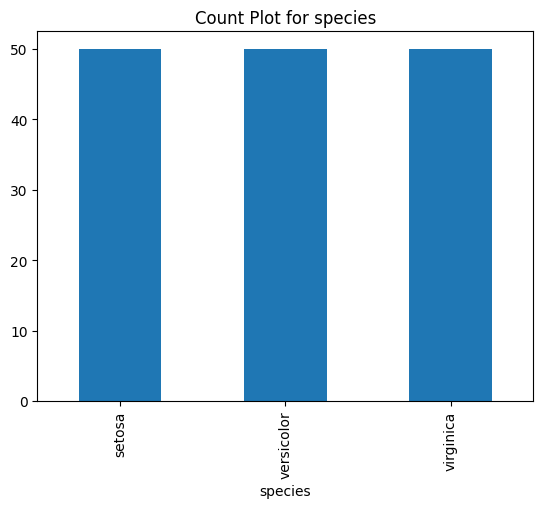

In [9]:
df["species"].value_counts().plot(kind="bar",title="Count Plot for species")

### Check value count

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Seperate X and Y

In [11]:
X = df.drop(columns=["species"])
Y= df[["species"]]

In [12]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


#### LABEL ENCODING (Y is object type(str type machine doenot understand this data machine can understand continues/numerical data so Label Encoding is done) 

In [14]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
Y["species"]=le.fit_transform(Y["species"])
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

#### Create Pipeline for X and Y (Preprocessing)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#### Numeric Pipeline

In [21]:
num_pipe = Pipeline(steps=[("impute",SimpleImputer(strategy="mean")),
                           ("scaler",StandardScaler())])

In [26]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [27]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [28]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### TRAIN TEST Split data

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.33,random_state=42)

In [30]:
xtrain.shape

(100, 4)

In [31]:
xtest.shape

(50, 4)

In [32]:
xtrain.shape

(100, 4)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)
LogisticRegression()

LogisticRegression()

In [35]:
# Accuracy in Traning
model.score(xtrain,ytrain)

0.98

In [36]:
# Accuracy in Testing
model.score(xtest,ytest)

0.96

#### Predicting Train and Test Data

In [37]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [38]:
ypred_tr[0:5]

array([2, 0, 0, 0, 2], dtype=int64)

In [39]:
ytrain.head()

,species
119,2
23,0
38,0
37,0
145,2


In [40]:
ypred_ts[0:5]

array([2, 0, 1, 1, 2], dtype=int64)

In [41]:
ytest.head

<bound method NDFrame.head of      species
111        2
40         0
69         1
68         1
117        2
27         0
127        2
92         1
118        2
76         1
28         0
57         1
137        2
133        2
93         1
112        2
144        2
79         1
136        2
72         1
66         1
54         1
24         0
64         1
42         0
11         0
129        2
126        2
108        2
96         1
2          0
132        2
86         1
94         1
106        2
147        2
3          0
148        2
31         0
53         1
18         0
95         1
59         1
71         1
142        2
10         0
20         0
34         0
1          0
81         1>

#### Plotting confusion matrix for test data

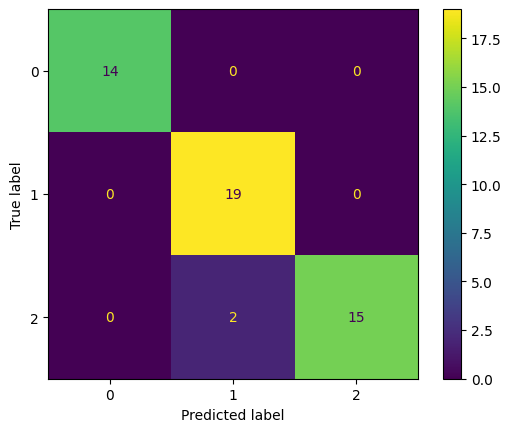

In [42]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

### Print classification report

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      1.00      0.95        19
           2       1.00      0.88      0.94        17

    accuracy                           0.96        50
   macro avg       0.97      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



### Getting Original Labels with le.inverse Transform

In [44]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)


In [45]:
ypred_tr_lb

array([2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0,
       1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0,
       0, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2,
       2, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 0])

In [46]:
ypred_ts_lb

array([2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       0, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 1])